<a href="https://colab.research.google.com/github/RaquelQuei/Afrodev_Olimpiadas_Pandas.ipynb/blob/main/Afrodev_Olimpiadas_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Raquel Queiroz - Afrodev
Base de Dados Olímpiadas de 2000 a 2012

1. Apresente: quantidade de linhas e colunas no arquivo, idade máxima, idade mínima e idade média.
2. Liste todos os registros da atleta Serena Williams.
3. Liste o nome de todos os países distintos que participaram das olimpíadas.
4. Liste os atletas que receberam mais de 3 medalhas de ouro.
5. Liste todos os atletas do esporte natação e do país Brasil.

In [138]:
import pandas as pd

In [139]:
df = pd.read_csv("/content/drive/MyDrive/Afrodev/base_de_dados_olimpiadas.csv")

# Explorando Dados
 A princípio havia optado por substituir Nan por 0, pois pensava que neste caso não iria me atrapalhar nos calculos, no entanto, durante a busca pelo valor minimo aparecia o 0, então desisti de substituir por 0 e apliquei .min(skipna=True) para desconsiderar os Nan , neste caso apenas 3 em atleta e em idade.

In [140]:
df.isnull().sum()

atleta     3
idade      3
pais       0
ano        0
data       0
esporte    0
ouro       0
prata      0
bronze     0
total      0
dtype: int64

In [141]:
df.sort_values(by= 'pais', ascending=True)

,atleta,idade,pais,ano,data,esporte,ouro,prata,bronze,total
1829,Rohullah Nikpai,25.0,Afghanistan,2012,12/08/2012,Taekwondo,0,0,1,1
1855,Rohullah Nikpai,21.0,Afghanistan,2008,24/08/2008,Taekwondo,0,0,1,1
1808,Sebastian Crismanich,25.0,Argentina,2012,12/08/2012,Taekwondo,1,0,0,1
2238,Georgina Bardach,20.0,Argentina,2004,29/08/2004,Swimming,0,0,1,1
1966,Patricia Tarabini,36.0,Argentina,2004,29/08/2004,Tennis,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
1842,Dalia Contreras,24.0,Venezuela,2008,24/08/2008,Taekwondo,0,0,1,1
998,Hoàng Anh Tu?n,23.0,Vietnam,2008,24/08/2008,Weightlifting,0,1,0,1
1917,Tr?n Hi?u Ngân,26.0,Vietnam,2000,01/10/2000,Taekwondo,0,1,0,1
16,Kirsty Coventry,24.0,Zimbabwe,2008,24/08/2008,Swimming,1,3,0,4


In [142]:
df["ano"].max()

2012

In [143]:
df["ano"].min()

2000

#1. Quantidade de linhas e colunas no arquivo, idade máxima, idade mínima e idade média.

1.1 Linhas x Colunas

In [144]:
linhas_colunas = df.shape
print(f"A quantidade de linhas e colunas é: {linhas_colunas}")

A quantidade de linhas e colunas é: (2398, 10)


1.2 Idade: máxima, mínima e média.

In [145]:
df["idade"].max()

46.0

In [146]:
df["idade"].min(skipna=True) 

15.0

In [147]:
df["idade"].mean(skipna=True)

25.19248434237996

#2. Liste todos os registros da atleta Serena Williams.

In [148]:
df_serena = df.loc[df['atleta']=='Serena Williams']

In [149]:
df_serena

,atleta,idade,pais,ano,data,esporte,ouro,prata,bronze,total
174,Serena Williams,30.0,United States,2012,12/08/2012,Tennis,2,0,0,2
1947,Serena Williams,26.0,United States,2008,24/08/2008,Tennis,1,0,0,1
1980,Serena Williams,18.0,United States,2000,01/10/2000,Tennis,1,0,0,1


# 3. Listando o nome de todos os países distintos que participaram das olimpíadas.

In [150]:
# Removendo países duplicados com drop_duplicates()
df_paises = df['pais'].drop_duplicates()

In [151]:
# Quantos países participaram
df_paises.count()

82

In [152]:
# Mostrando todos os países
df_paises.head(82)

0            United States
4                   Russia
5                Australia
12                  Canada
14                  Norway
               ...        
1808             Argentina
1829           Afghanistan
1830                 Gabon
1852    Dominican Republic
1955               Belgium
Name: pais, Length: 82, dtype: object

# 4. Listando os atletas que receberam mais de 3 medalhas de ouro.

In [153]:
# Esta visualização é específica para o ano em que receberam mais que 3.
df.loc[df['ouro'] > 3]

,atleta,idade,pais,ano,data,esporte,ouro,prata,bronze,total
0,Michael Phelps,23.0,United States,2008,24/08/2008,Swimming,8,0,0,8
1,Michael Phelps,19.0,United States,2004,29/08/2004,Swimming,6,0,2,8
2,Michael Phelps,27.0,United States,2012,12/08/2012,Swimming,4,2,0,6
6,Missy Franklin,17.0,United States,2012,12/08/2012,Swimming,4,0,1,5
34,Ole Einar Bjørndalen,28.0,Norway,2002,24/02/2002,Biathlon,4,0,0,4


# 5. Listando todos os atletas do esporte natação e do país Brasil.

In [154]:
# Criando um Data Frame para o Brazil contendo todos os atletas
df_brazil = df.loc[df['pais'] == 'Brazil']

In [155]:
# Criando um Data Frame para o Brazil contendo apenas os atletas de Swimming
df_brazil_Swimming = df_brazil.loc[df['esporte'] == 'Swimming']

In [156]:
# Visualizando o df específico do Brazil em Swimming
df_brazil_Swimming

,atleta,idade,pais,ano,data,esporte,ouro,prata,bronze,total
222,César Cielo Filho,21.0,Brazil,2008,24/08/2008,Swimming,1,0,1,2
2080,César Cielo Filho,25.0,Brazil,2012,12/08/2012,Swimming,0,0,1,1
2138,Thiago Pereira,26.0,Brazil,2012,12/08/2012,Swimming,0,1,0,1
2322,Gustavo Borges,27.0,Brazil,2000,01/10/2000,Swimming,0,0,1,1
2341,Carlos Jayme,20.0,Brazil,2000,01/10/2000,Swimming,0,0,1,1
2370,Xuxa Scherer,25.0,Brazil,2000,01/10/2000,Swimming,0,0,1,1
2371,Edvaldo Silva Filho,22.0,Brazil,2000,01/10/2000,Swimming,0,0,1,1


In [157]:
# Visualizando o df geral do Brazil
df_brazil

,atleta,idade,pais,ano,data,esporte,ouro,prata,bronze,total
222,César Cielo Filho,21.0,Brazil,2008,24/08/2008,Swimming,1,0,1,2
1428,NaN,NaN,Brazil,2012,12/08/2012,Volleyball,0,1,0,1
1429,NaN,NaN,Brazil,2012,12/08/2012,Volleyball,0,1,0,1
1430,NaN,NaN,Brazil,2012,12/08/2012,Volleyball,0,1,0,1
1432,Thiago Alves,26.0,Brazil,2012,12/08/2012,Volleyball,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
2138,Thiago Pereira,26.0,Brazil,2012,12/08/2012,Swimming,0,1,0,1
2322,Gustavo Borges,27.0,Brazil,2000,01/10/2000,Swimming,0,0,1,1
2341,Carlos Jayme,20.0,Brazil,2000,01/10/2000,Swimming,0,0,1,1
2370,Xuxa Scherer,25.0,Brazil,2000,01/10/2000,Swimming,0,0,1,1


#Curiosidades

In [158]:
# Idade no geral
age = df['idade'].value_counts()
display(age)

25.0    226
24.0    223
26.0    211
22.0    196
23.0    193
27.0    176
21.0    172
28.0    159
29.0    130
20.0    122
30.0    100
19.0     85
31.0     76
32.0     70
18.0     52
33.0     38
34.0     36
17.0     36
16.0     25
36.0     18
35.0     14
38.0      9
15.0      7
39.0      6
37.0      4
40.0      3
42.0      2
41.0      2
46.0      2
45.0      1
44.0      1
Name: idade, dtype: int64

In [159]:
#Quantas vezes cada esporte aparece com relação ao Brazil.
df_brazil['esporte'].value_counts()

Volleyball    72
Swimming       7
Taekwondo      1
Name: esporte, dtype: int64

In [160]:
#Quantas vezes cada esporte aparece no Geral.
df['esporte'].value_counts()

Swimming                     487
Waterpolo                    306
Volleyball                   281
Wrestling                    245
Weightlifting                180
Taekwondo                    112
Synchronized Swimming        109
Tennis                        71
Table Tennis                  67
Gymnastics                    62
Athletics                     58
Cycling                       39
Canoeing                      38
Cross pais Skiing             35
Biathlon                      33
Short-Track Speed Skating     31
Diving                        29
Speed Skating                 28
Fencing                       26
Equestrian                    25
Triathlon                     24
Trampoline                    24
Alpine Skiing                 23
Ski Jumping                   12
Archery                       12
Shooting                      11
Nordic Combined               10
Rowing                         9
Bobsleigh                      6
Badminton                      5
Name: espo

In [161]:
medalhas_brazil = df_brazil[['esporte','ouro', 'prata', 'bronze']]
display(medalhas_brazil)

,esporte,ouro,prata,bronze
222,Swimming,1,0,1
1428,Volleyball,0,1,0
1429,Volleyball,0,1,0
1430,Volleyball,0,1,0
1432,Volleyball,0,1,0
...,...,...,...,...
2138,Swimming,0,1,0
2322,Swimming,0,0,1
2341,Swimming,0,0,1
2370,Swimming,0,0,1


Visualizando Medalhas Brasileiras por esporte.

In [162]:
medalhas_brazil.sum()

esporte    SwimmingVolleyballVolleyballVolleyballVolleyba...
ouro                                                      37
prata                                                     25
bronze                                                    19
dtype: object

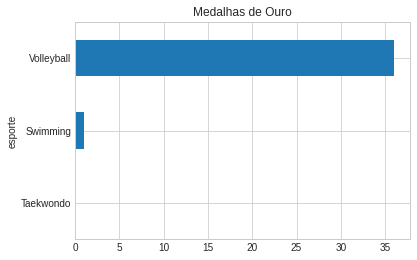

In [163]:
medalhas_brazil.groupby("esporte")["ouro"].sum().sort_values(ascending=True).plot.barh(title= "Medalhas de Ouro");

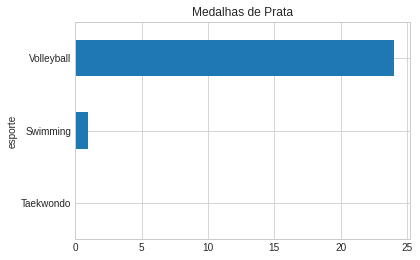

In [164]:
medalhas_brazil.groupby("esporte")["prata"].sum().sort_values(ascending=True).plot.barh(title= "Medalhas de Prata");

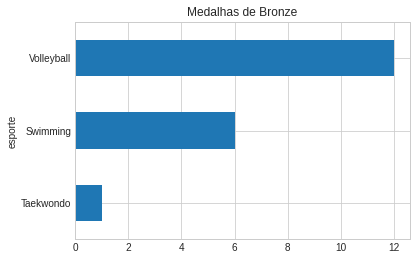

In [165]:
medalhas_brazil.groupby("esporte")["bronze"].sum().sort_values(ascending=True).plot.barh(title= "Medalhas de Bronze");